Graficos de la señal a estudiar

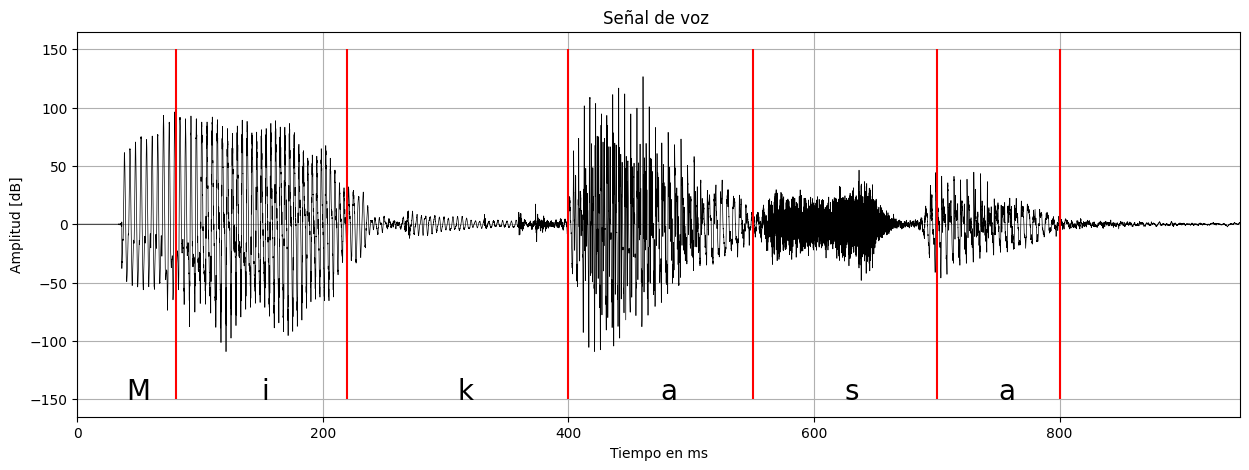

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.fft import fft

#Cargar archivo de audio
audio = wave.open(r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav', "rb" )

# Obtener variables del archivo de audio
FS = audio.getframerate() #Frecuencia de muestreo
n_samples = audio.getnframes() #Numero de muestras
signal_wave = audio.readframes(-1)  #amplitud

audio.close() # cierro archivo 

#duración del audio en seg
audio_duration = n_samples / FS #duracion

# Convertir la señal de audio en un array de numpy
signal_array = np.frombuffer(signal_wave, dtype= np.int16)

#Generar el array de tiempos en milisegundos
times = np.linspace(0,audio_duration, num = n_samples)*1000

# Crear la figura para la gráfica
plt.figure(figsize=(15,5))

# Graficar la señal de audio
plt.plot(times , signal_array/100,color = "black",linewidth=0.5)

# Marcar fonemas en la señal de audio
# Fonema [a]
plt.vlines(x = 400,ymin= -150,ymax= 150, color = 'r')
plt.text(475, -150, 'a', fontsize=20)
plt.vlines(x = 550,ymin= -150,ymax= 150, color = 'r')

# Fonema [a2]
plt.vlines(x = 700,ymin= -150,ymax= 150, color = 'r')
plt.text(750, -150, 'a', fontsize=20)
plt.vlines(x = 800,ymin= -150,ymax= 150, color = 'r')

# Fonema [i] 
plt.vlines(x = 80,ymin= -150,ymax= 150, color = 'r')
plt.text(150, -150, 'i', fontsize=20)
plt.vlines(x = 220,ymin= -150,ymax= 150, color = 'r')

# Texto adicional en la gráfica
plt.text(40, -150, 'M', fontsize=20)
plt.text(310, -150, 'k', fontsize=20)
plt.text(625, -150, 's', fontsize=20)

# Configuración de la gráfica
plt.title("Señal de voz ")
plt.xlim(0,(audio_duration)*1000 - 400 )
plt.ylabel("Amplitud [dB]", color = "black")
plt.xlabel("Tiempo en ms", color = "black")
plt.grid()
plt.show()

INTERVALO DE LAS SEÑALES

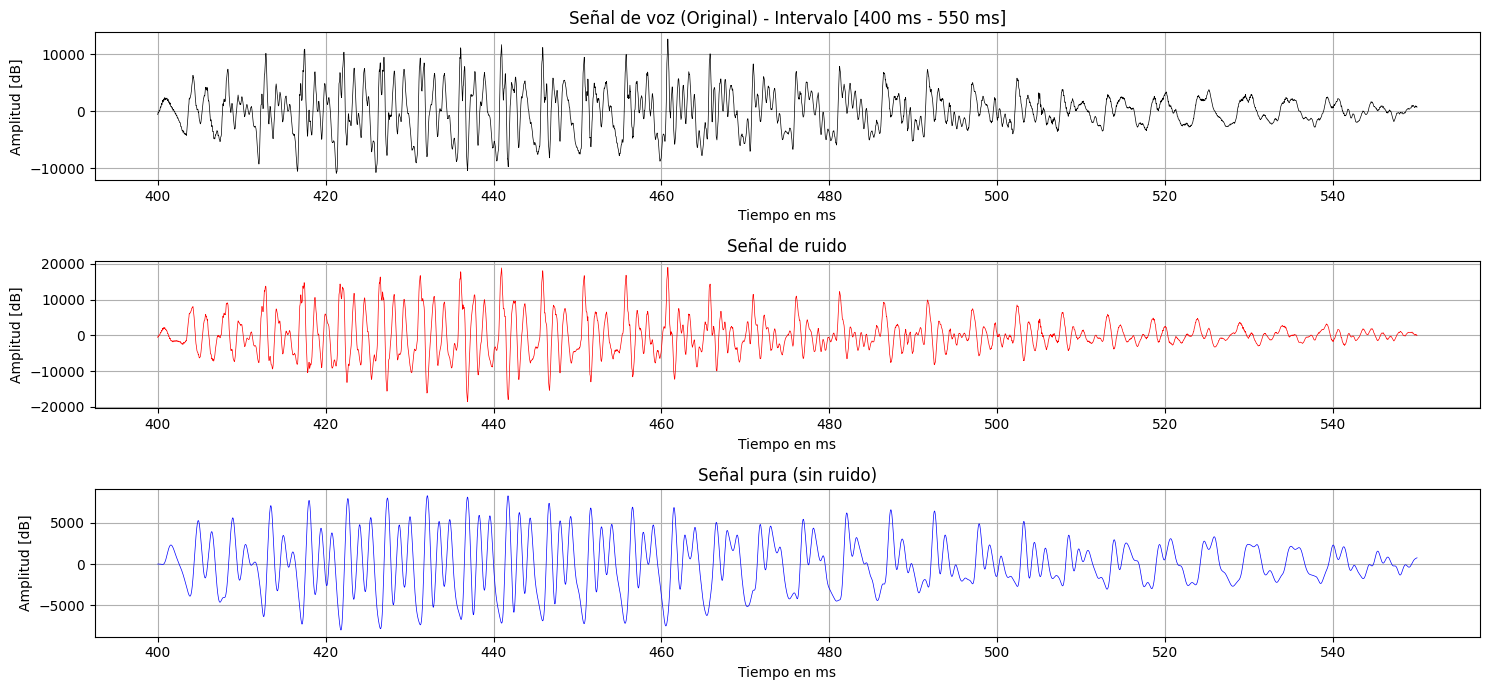

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.signal import butter, lfilter, find_peaks

# Cargar archivo de audio
audio = wave.open(r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav', "rb")

# Obtener variables del archivo de audio
FS = audio.getframerate() #Frecuencia de muestreo
n_samples = audio.getnframes() #Cantidad de muestras
signal_wave = audio.readframes(-1) #Amplitudes

audio.close() #Cierro archivo

# Duración del audio en segundos
audio_duration = n_samples / FS

# Convertir la señal a un array de numpy
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

# intervalo de tiempo para a)
start_time_ms = 400  # Tiempo inicial en ms
end_time_ms = 550    # Tiempo final en ms

#intervalo de tiempo para a2)
#start_time_ms = 700  # Tiempo inicial en ms
#end_time_ms = 800    # Tiempo final en ms

#intervalo de tiempo para i)
#start_time_ms = 50  # Tiempo inicial en ms
#end_time_ms = 220    # Tiempo final en ms

#intervalo de tiempo para s)
#start_time_ms = 550  # Tiempo inicial en ms
#end_time_ms = 590    # Tiempo final en ms

# Convertir tiempos a muestras
start_sample = int(start_time_ms / 1000 * FS)
end_sample = int(end_time_ms / 1000 * FS)

# Obtener la porción de la señal dentro del intervalo definido
signal_interval = signal_array[start_sample:end_sample]
times_interval = np.linspace(start_time_ms, end_time_ms, num=len(signal_interval))

# Filtrar la señal para separar la componente pura y con ruido

# Definir funciones para el filtro pasa bajos
#Diseña un filtro pasa bajos Butterworth.
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
#Aplica el filtro pasa bajos a los datos de entrada.
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Frecuencia de corte del filtro 
cutoff_frequency = 1000.0  # Hz

# Aplicar filtro pasa bajos a la señal del intervalo
filtered_signal_interval = butter_lowpass_filter(signal_interval, cutoff_frequency, FS, order=6)

# Señal con ruido (componente de alta frecuencia) en el intervalo
signal_with_noise_interval = signal_interval - filtered_signal_interval

# Señal pura (sin ruido) en el intervalo
signal_without_noise_interval = filtered_signal_interval

# Graficar señal original, señal con ruido y señal sin ruido solo para el intervalo definido
plt.figure(figsize=(15, 7))

# Subplot 1: Señal de voz original en el intervalo definido
plt.subplot(3, 1, 1)
plt.plot(times_interval, signal_interval, color="black", linewidth=0.5)
plt.title(f"Señal de voz (Original) - Intervalo [{start_time_ms} ms - {end_time_ms} ms]")
plt.ylabel("Amplitud [dB]")
plt.xlabel("Tiempo en ms")
plt.grid()

# Subplot 2: Señal de ruido (componente de alta frecuencia) en el intervalo
plt.subplot(3, 1, 2)
plt.plot(times_interval, signal_with_noise_interval, color="red", linewidth=0.5)
plt.title("Señal de ruido")
plt.ylabel("Amplitud [dB]")
plt.xlabel("Tiempo en ms")
plt.grid()

# Subplot 3: Señal pura (sin ruido) en el intervalo
plt.subplot(3, 1, 3)
plt.plot(times_interval, signal_without_noise_interval, color="blue", linewidth=0.5)
plt.title("Señal pura (sin ruido)")
plt.ylabel("Amplitud [dB]")
plt.xlabel("Tiempo en ms")
plt.grid()

# Ajustar el diseño de los subplots para que no se superponga
plt.tight_layout()
plt.show()



METODO DE AUTOCORRELACIÓN PARA HALLAR EL PERIODO DE LOS SEGMENTOS DE SEÑAL

Periodo calculado: 0.0040 segundos (175 muestras)


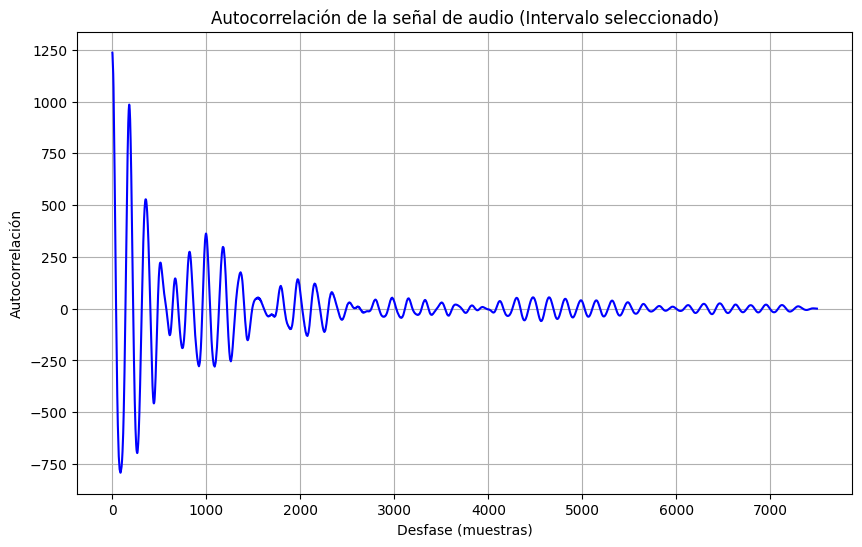

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.signal import find_peaks

# Función para cargar y obtener la señal de audio dentro de un intervalo de tiempo específico
def load_audio_segment(file_path, start_time, end_time):
    audio = wave.open(file_path, "rb")
    FS = audio.getframerate()
    n_samples = audio.getnframes()
    signal_wave = audio.readframes(-1)
    audio.close()

    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    audio_duration = n_samples / FS

    start_sample = int(start_time * FS)
    end_sample = int(end_time * FS)

    return signal_array[start_sample:end_sample], FS

# Función para calcular el periodo dentro de un intervalo de tiempo específico
def calculate_period(signal, fs):
    # Normalizar la señal entre -1 y 1
    normalized_signal = signal / np.max(np.abs(signal))

    # Calcular la autocorrelación de la señal
    autocorr = np.correlate(normalized_signal, normalized_signal, mode='full')

    # Considerar solo la mitad derecha de la autocorrelación (eliminando la parte negativa)
    autocorr = autocorr[len(autocorr) // 2:]

    # Encontrar los picos en la autocorrelación (excepto el primer pico que es el pico de la señal consigo misma)
    peaks, _ = find_peaks(autocorr, height=0)
    if len(peaks) < 2:
        raise ValueError("No se encontraron suficientes picos en la autocorrelación para calcular el periodo.")

    # Calcular el periodo como la distancia entre el primer y segundo pico en muestras
    period_samples = peaks[1] - peaks[0]

    # Convertir el periodo a segundos
    period_seconds = period_samples / fs

    return period_seconds, period_samples, autocorr

# Definir los tiempos de inicio y fin del intervalo de interés en segundos
#primer vocal a
#start_time = 0.4
#end_time = 0.55
#ultima vocal a 
#start_time = 0.7
#end_time = 0.8
#intervalo de tiempo para i)
start_time = 0.05 
end_time = 0.22    

# Ruta del archivo de audio
file_path = r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav'

# Cargar el segmento de audio dentro del intervalo especificado
try:
    signal_segment, fs = load_audio_segment(file_path, start_time, end_time)

    # Calcular el periodo de la señal dentro del intervalo especificado
    period_seconds, period_samples, autocorr = calculate_period(signal_segment, fs)
    print(f"Periodo calculado: {period_seconds:.4f} segundos ({period_samples} muestras)")

    # Graficar la autocorrelación para visualización
    lag = np.arange(len(autocorr))
    plt.figure(figsize=(10, 6))
    plt.plot(lag, autocorr, color='blue')
    plt.title('Autocorrelación de la señal de audio (Intervalo seleccionado)')
    plt.xlabel('Desfase (muestras)')
    plt.ylabel('Autocorrelación')
    plt.grid()
    plt.show()

except ValueError as e:
    print(f"No se pudo calcular el periodo: {e}")
except Exception as e:
    print(f"Error al cargar o procesar el segmento de audio: {e}")


SEÑALES PERIODICAS Y APERIODICAS

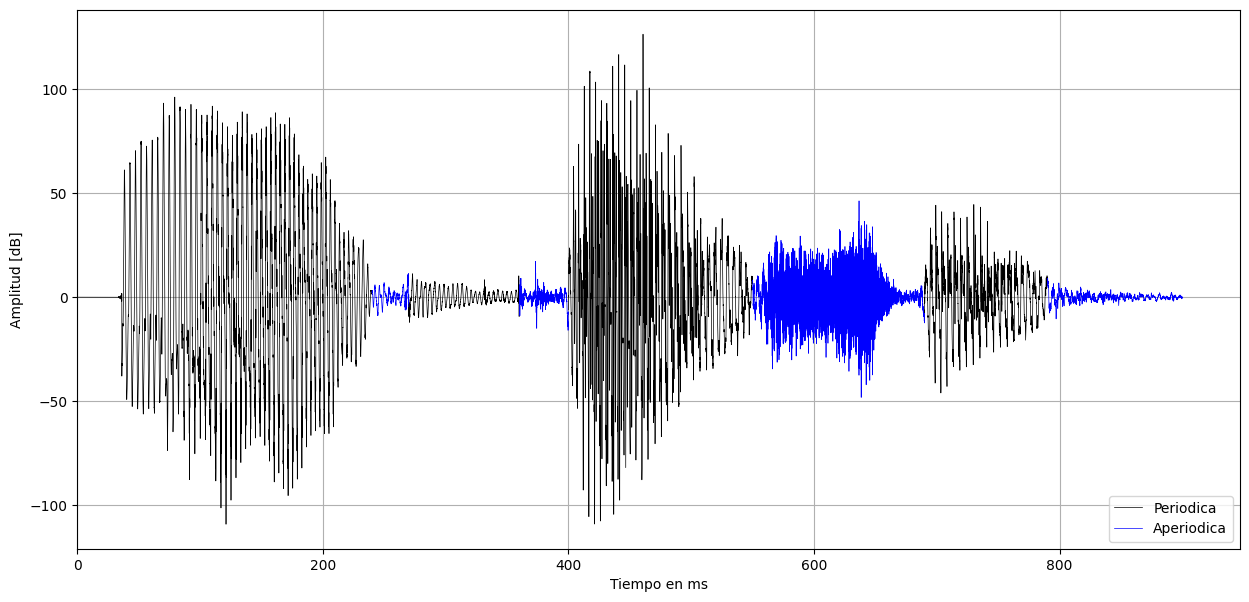

In [49]:
#---------------------------------SEÑALES PERIODICAS Y APERIODICAS
#periodicas:
plt.figure(figsize=(15, 7))

inicio_a = 0
final_a = int(0.24*FS)
plt.plot(times[inicio_a:final_a], signal_array[inicio_a:final_a]/100, color='black', label= 'Periodica', linewidth=0.5)

inicio_c = int(0.27*FS)
final_c = int(0.36*FS)
plt.plot(times[inicio_c:final_c], signal_array[inicio_c:final_c]/100, color='black', linewidth=0.5)

inicio_d = int(0.4*FS)
final_d = int(0.55*FS)
plt.plot(times[inicio_d:final_d], signal_array[inicio_d:final_d]/100, color='black',linewidth=0.5)

inicio_h = int(0.69*FS)
final_h = int(0.79*FS)
plt.plot(times[inicio_h:final_h], signal_array[inicio_h:final_h]/100, color='black',linewidth=0.5)

#aperiodicas:

inicio_b = int(0.24*FS)
final_b = int(0.27*FS)
plt.plot(times[inicio_b:final_b], signal_array[inicio_b:final_b]/100, color='b', label= 'Aperiodica', linewidth=0.5)

inicio_f = int(0.36*FS)
final_f = int(0.4*FS)
plt.plot(times[inicio_f:final_f], signal_array[inicio_f:final_f]/100, color='b',linewidth=0.5)

inicio_l = int(0.55*FS)
final_l = int(0.69*FS)
plt.plot(times[inicio_l:final_l], signal_array[inicio_l:final_l]/100, color='b',linewidth=0.5)


inicio_e = int(0.79*FS)
final_e = int(0.9*FS)
plt.plot(times[inicio_e:final_e], signal_array[inicio_e:final_e]/100, color='b',linewidth=0.5)

plt.legend(loc='lower right')

plt.xlim(0,(audio_duration)*1000 - 400 )
plt.ylabel("Amplitud [dB]", color = "black")
plt.xlabel("Tiempo en ms", color = "black")
plt.grid()
plt.show()

SERIES DE FOURIER

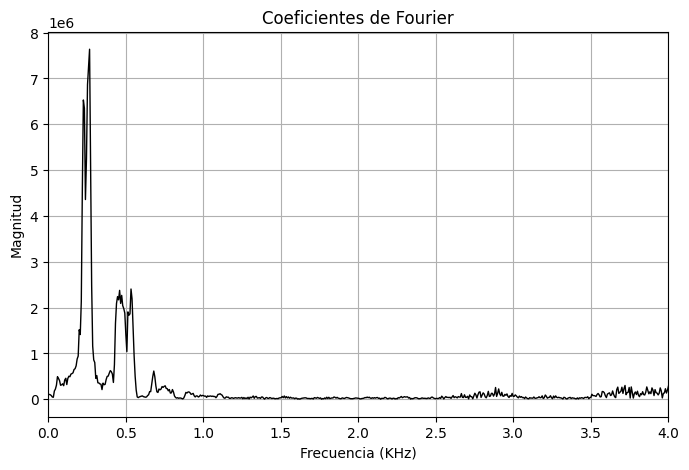

In [50]:

# Calcular la FFT

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import wave

audio_signal = wave.open(r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav', "rb" ) #leo el archivo del audio

signal_wave = audio_signal.readframes(-1)  #amplitud 

signal_array = np.frombuffer(signal_wave, dtype= np.int16) #creo un vector y guardo esas amplitudes

sample_rate = audio_signal.getframerate()

#vocal I
#para la totalidad de la señal. puedo hallar la cantidad de periodos teniendo en cuenta su frecuencia
inicio_señal = 30*100
final_señal = 96*100
#para 11 periodos:
#inicio_señal = 44*100
#final_señal = 64*100
#para un periodo:
#inicio_señal = 44*100
#final_señal = 46*100

#vocal a 
#inicio_señal = 176*100
#final_señal = 242*100
# para 6 periodos:
#inicio_señal = 190*100
#final_señal = 203*100
#para un solo periodo:
#inicio_señal = 179*100
#final_señal = 182*100

#vocal a2
    #inicio_señal = 305*100
    #final_señal = 344*100
#para 5 periodos:
#inicio_señal = 310*100
#final_señal = 322*100
#para 1 periodo:
#inicio_señal = 308*100
#final_señal = 311*100

signal_array = signal_array[inicio_señal:final_señal]

plt.figure(figsize=(8,5))
# Calcula la FFT de la señal de audio
fft_result = np.fft.fft(signal_array) #calculo mi transformada de fourier

# Calcula las frecuencias correspondientes

frequencies = np.fft.fftfreq(len(signal_array), d=1/sample_rate)#esta va a ser mi frecuencia de muestreo
# Grafica los coeficientes de Fourier

#Debido a las propiedades de simetria solo es suficiente con tener las frecuencias positivas 
positive_frequencies = frequencies[:len(frequencies)//2]
positive_dft_result = fft_result[:len(fft_result)//2]

plt.plot(positive_frequencies/1000, np.abs(positive_dft_result), color='black', linewidth=1)
plt.xlim(0,4)

plt.xlabel('Frecuencia (KHz)')
plt.ylabel('Magnitud')
plt.title('Coeficientes de Fourier')
plt.grid(True)
plt.show()



Espectogramas de las vocales

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6420\317866026.py:44: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='interp')


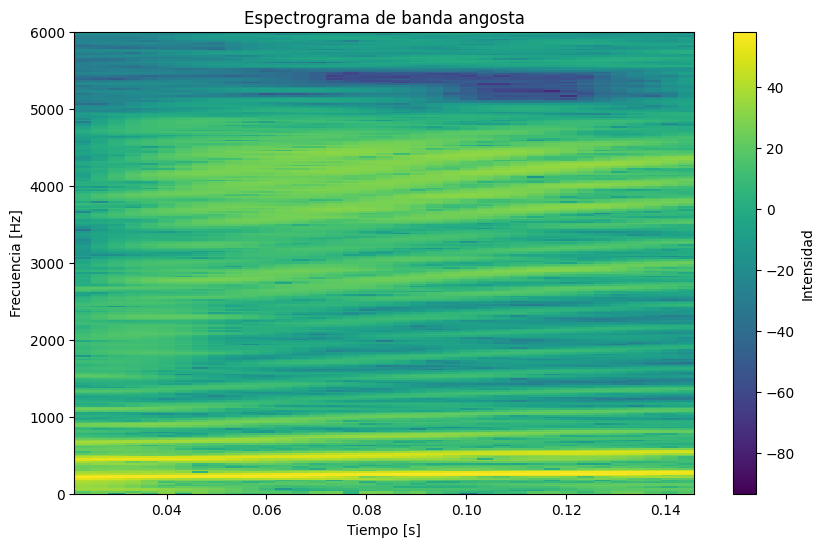

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6420\317866026.py:69: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(times, frequencies, np.log10(np.abs(S)), shading='interp', cmap='viridis')


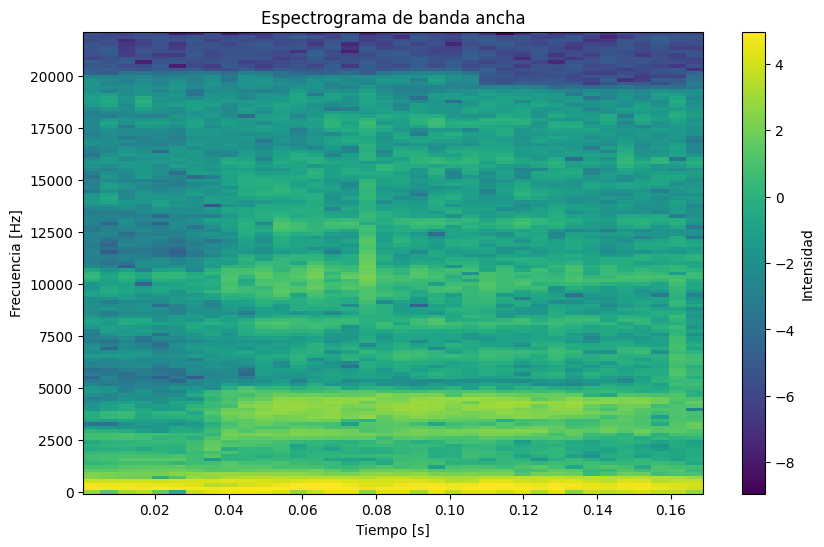

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from scipy import signal

# Carga el archivo .wav (asegúrate de que sea mono, no estéreo)
file_name = r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav'
FS, vocals = wavfile.read(file_name)
noverlap = 80
NFFT = 8820 # longitud de mi fft, mas o menos habia calculado esto

# Definir las regiones de las vocales 
#vowel_start_time = 0  # tiempo en segundos
#vowel_end_time = len(vocals) # tiempo en segundos

#intervalo de a)
#vowel_start_time = 0.4  # tiempo en segundos
#vowel_end_time = 0.55 # tiempo en segundos

#intervalo a2)
#vowel_start_time = 0.7  # tiempo en segundos
#vowel_end_time = 0.8 # tiempo en segundos

#intervalo i)
vowel_start_time = 0.05  # tiempo en segundos
vowel_end_time = 0.22 # tiempo en segundos


# Convertir los tiempos a índices
start_index = int(vowel_start_time * FS)
end_index = int(vowel_end_time * FS)

# Extraer la porción de audio correspondiente a las vocales
vowel_data = vocals[start_index:end_index]

nperseg_narrow = 2048  # Tamaño de la ventana
noverlap_narrow = 1900  # Solapamiento entre ventanas
# Calcula el espectrograma con una ventana más pequeña
frequencies, times, S = spectrogram(vowel_data,fs=FS,nperseg = nperseg_narrow, noverlap = noverlap_narrow, window ='hann' )

# Grafica el espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='interp')
#plt.pcolormesh(times, frequencies, np.log10(np.abs(S)), shading='interp')
#Estetica del gráfico---

#plt.vlines(x = 0.3,ymin = 0, ymax = 6000, color = 'red', linestyle= '--') 
#plt.vlines(x = 0.65,ymin = 0, ymax = 6000, color = 'red', linestyle= '--') 
#plt.xlim(0.03,1)
plt.ylim(0, 6000)
plt.title('Espectrograma de banda angosta')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
# Agrega la barra de colores
plt.colorbar(label='Intensidad')
plt.show()



# Calcula el espectrograma con una ventana más chica 
nperseg_narrow = 256  # Tamaño de la ventana
noverlap_narrow = 50  # Solapamiento entre ventanas
# Calcula el espectrograma con una ventana más pequeña
frequencies, times, S = spectrogram(vowel_data,fs=FS,nperseg = nperseg_narrow, noverlap = noverlap_narrow, window ='hann' )

plt.figure(figsize=(10, 6))
# Grafica el espectrograma nuevamente
plt.pcolormesh(times, frequencies, np.log10(np.abs(S)), shading='interp', cmap='viridis')
#plt.vlines(x = 0.3,ymin = 0, ymax = 9000, color = 'red', linestyle= '--') 
#plt.vlines(x = 0.6,ymin = 0, ymax = 9000, color = 'red', linestyle= '--') 
#plt.xlim(0.02,1)
#plt.ylim(0, 6000)
plt.title('Espectrograma de banda ancha')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
# Agrega la barra de colores
plt.colorbar(label='Intensidad')
plt.show()


SEÑAL DECIMADA

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6420\1918710585.py:49: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='interp')


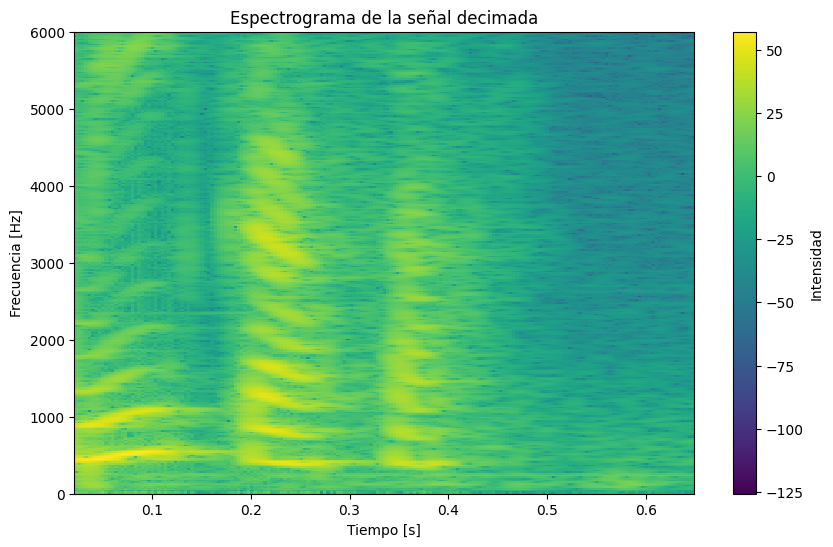

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram, decimate,  resample_poly, firwin,  lfilter
from scipy import signal

# Carga el archivo .wav 
file_name = r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav'
FS, vocals = wavfile.read(file_name)
noverlap = 80
NFFT = 8820 # longitud de mi fft, mas o menos habia calculado esto
window = np.hamming(2048) 


# Filtro antialiasing (pasa bajo)
cutoff_frequency = 0.4 * FS / 2 # Frecuencia de corte (ajusta según tus necesidades). La frecuencia de Nyquist es la mitad de la frecuencia de muestreo (FS/2).
filter_order = 100  # Orden del filtro FIR. Un filtro con un orden más alto proporciona una mejor atenuación en la banda de rechazo.

#Un filtro con un orden más alto requiere más cálculos y memoria.
#Si estás procesando señales en tiempo real o en sistemas con recursos limitados, elige un orden que sea suficiente para tus necesidades sin ser excesivo.

filter_coefficients = firwin(filter_order, cutoff_frequency, fs=FS, pass_zero=True)

# Aplicamos el filtro antialiasing
vocals_filtered = lfilter(filter_coefficients, 1, vocals)

# Decimación para duplicar la velocidad
decimation_factor = 2
vocals_decimated = vocals_filtered[::decimation_factor]

# Extraer la porción de audio correspondiente a las vocales (reemplaza con tus valores)
start_index = 0
end_index = len(vocals_decimated)

vowel_data = vocals_decimated[start_index:end_index]


#Parametros para el espectograma
nperseg_narrow = 2048  # Tamaño de la ventana
noverlap_narrow = 1900  # Solapamiento entre ventanas


# Calcula el espectrograma con una ventana más pequeña
frequencies, times, S = spectrogram(vowel_data,fs=FS, noverlap = 1900, window = window )


# Grafica el espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='interp')

#Estetica del gráfico---

plt.ylim(0, 6000)
plt.title('Espectrograma de la señal decimada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
# Agrega la barra de colores
plt.colorbar(label='Intensidad')
plt.show()



SEÑAL INTERPOLADA

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6420\3063060074.py:47: UserWarning: shading value 'interp' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='interp')


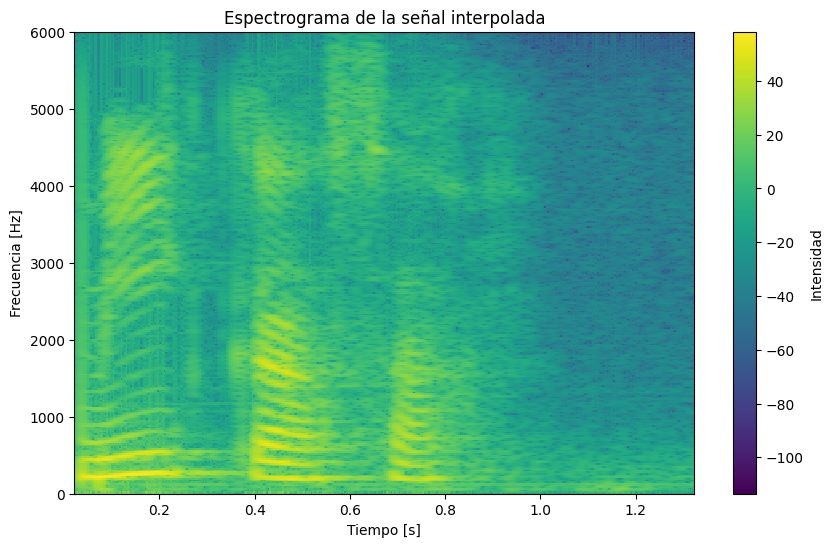

In [53]:
#import numpy as np
#import matplotlib.pyplot as plt
#from scipy.io import wavfile
from scipy.signal import spectrogram, decimate,  resample_poly, firwin,  lfilter
from scipy import signal


# Carga el archivo .wav corresponde al audio de "mikasa"
file_name = r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav'
FS, vocals = wavfile.read(file_name) #Devuelve la frecuencia de muestreo FS y los datos del audio (vocals)

#Parametros para el espectograma
noverlap = 80 #superposición de los segmentos de la señal
NFFT = 8820 # longitud de mi fft, mas o menos habia calculado esto
window = np.hamming(2048) #ventana de Hamming aplicada a cada segmento de la señal

# Filtro antialiasing (pasa bajo) FILTRO FIR
cutoff_frequency = 0.25 * FS / 2  # Frecuencia de corte (ajusta según tus necesidades)
filter_order = 100 # Orden del filtro 
filter_coefficients = firwin(filter_order, cutoff_frequency, fs=FS, pass_zero=True) #crea los coeficientes del filtro

# Aplicamos el filtro antialiasing
vocals_filtered = lfilter(filter_coefficients, 1, vocals)

# Interpolación para reducir a la mitad la velocidad
interpolation_factor = 2
vocals_interpolated = np.repeat(vocals_filtered, interpolation_factor) #duplica cada muestra 

#nuevamente volvemos a aplicar un filtro luego de la interpolación
vocals_interpolated_filtered = lfilter(filter_coefficients, 1, vocals_interpolated) 


# Tomamos cada segundo valor para disminuir la velocidad a la mitad
vocals_half_speed = vocals_interpolated_filtered[::interpolation_factor]

# Intervalo de la señal 
start_index = 0
end_index = len(vocals_half_speed)

vowel_data = vocals_half_speed[start_index:end_index]

# Calcula el espectrograma con una ventana grande
frequencies, times, S = spectrogram(vowel_data,fs=FS, noverlap = 1900, window = window )

# Grafica el espectrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(S), shading='interp')

#Estetica del gráfico---

plt.ylim(0, 6000)
plt.title('Espectrograma de la señal interpolada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
# Agrega la barra de colores
plt.colorbar(label='Intensidad')
plt.show()

SEÑAL CON VELOCIDAD DISMINUIDA 

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6420\4142533582.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  spec_interpolated[:, ::2] = spec_orig
C:\Users\Administrador\AppData\Local\Temp\ipykernel_6420\4142533582.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  spec_interpolated[:, 1::2] = spec_orig


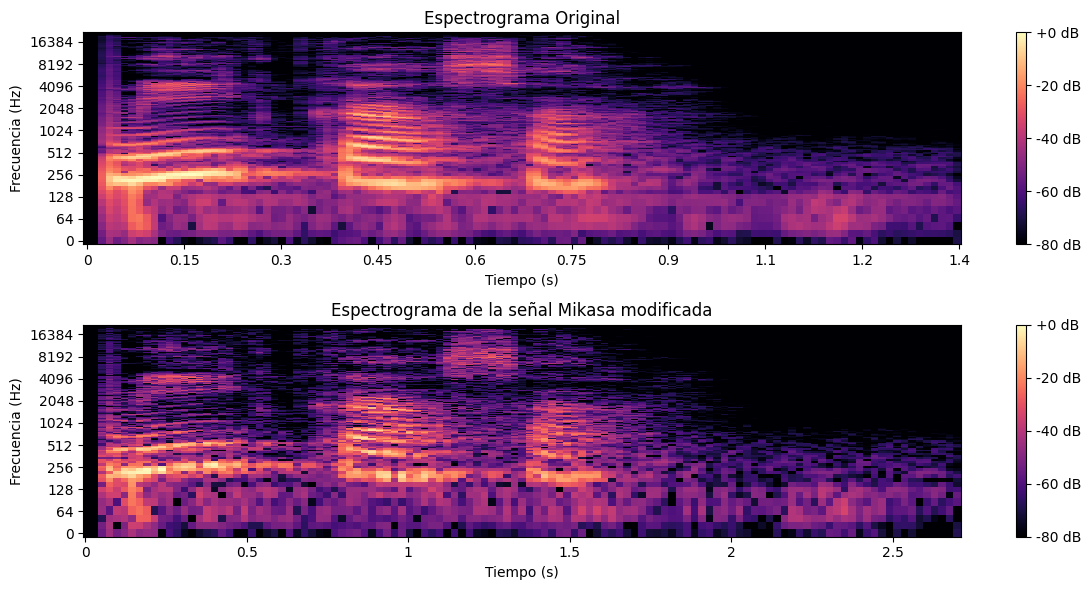

Reproduciendo la señal original...
Reproduciendo la señal modificada...


In [59]:
import librosa
import librosa.display
import sounddevice as sd

# Carga la señal Mikasa 
samples, FS = librosa.load(r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav', sr=None) 

# Calcula la TFCT de la señal original
n_fft = 2048
spec_orig = librosa.stft(samples, n_fft=n_fft)

# Interpola las columnas originales para obtener una matriz con columnas intercaladas
num_columns = spec_orig.shape[1] #devuelve el número de columnas
#cada columna representa el espectro de frecuencia de una pequeña porción de la señal de audio.

spec_interpolated = np.zeros((spec_orig.shape[0], num_columns * 2)) # inicializo una matriz de ceros con el doble de columnas que spec_orig, conservando el n de filas
spec_interpolated[:, ::2] = spec_orig
spec_interpolated[:, 1::2] = spec_orig

# Calcula la iTFCT de la matriz interpolada
samples_modified = librosa.istft(spec_interpolated)

# Grafica el espectrograma original y el modificado
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spec_orig), ref=np.max), sr=FS,  x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')


# Grafica el espectrograma de la señal modificada
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spec_interpolated), ref=np.max), sr=FS, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la señal Mikasa modificada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')

plt.tight_layout()
plt.show()

# Reproduce la señal original
print("Reproduciendo la señal original...")
sd.play(samples)
sd.wait()

# Reproduce la señal modificada
print("Reproduciendo la señal modificada...")
sd.play(samples_modified)
sd.wait()

SEÑAL CON VELOCIDAD AUMENTADA BAJO EL METODO DE PHASE VECODER

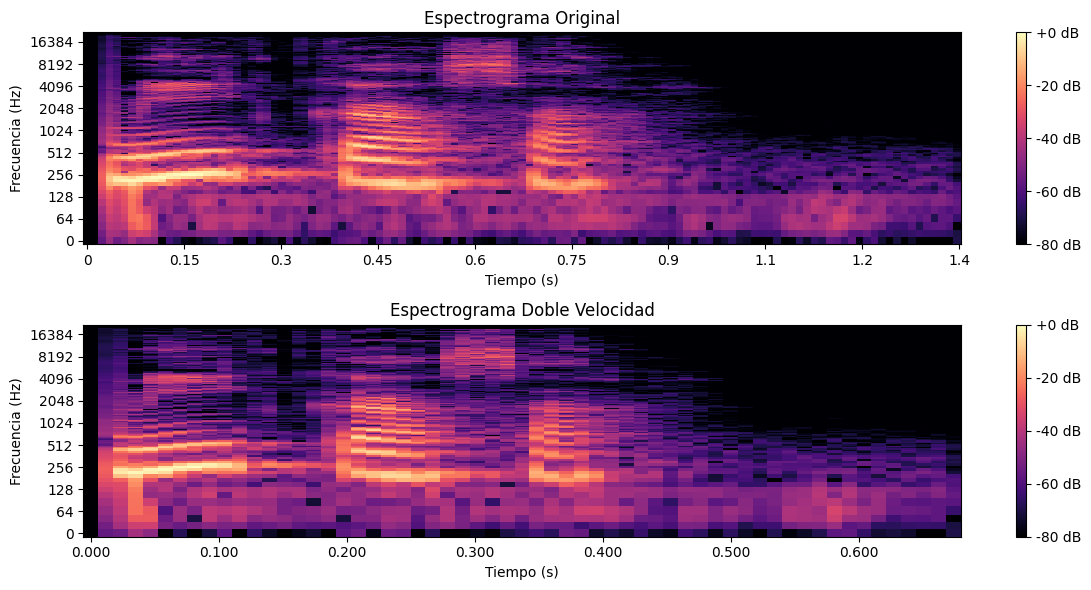

Reproduciendo la señal original...
Reproduciendo la señal duplicada...


In [58]:

samples, FS = librosa.load(r'C:\Users\Administrador\Desktop\Facultad\sys\TP\audio.wav' , sr=None)

# Calcula la TFCT de la señal original
n_fft = 2048
spec_orig = librosa.stft(samples, n_fft=n_fft)

# Aumenta la velocidad (eliminando una de cada dos columnas del espectrograma)
spec_double_speed = spec_orig[:, ::2]

# Reconstruye la señal temporal utilizando la inversa de la STFT modificada
samples_double_speed = librosa.istft(spec_double_speed)

# Grafica el espectrograma original y el modificado
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spec_orig), ref=np.max), sr=FS, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spec_double_speed), ref=np.max), sr=FS, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma Doble Velocidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')

plt.tight_layout()
plt.show()

# Reproduce la señal original
print("Reproduciendo la señal original...")
sd.play(samples)
sd.wait()

# Reproduce la señal duplicada
print("Reproduciendo la señal duplicada...")
sd.play(samples_double_speed)
sd.wait()